In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


def gen_gaussian_data(num_feat=30, num_samples=100, num_class=5):
    means = np.random.normal(loc = 0, scale = 2, size=(num_class, num_feat))
    cov = [make_spd_matrix(num_feat, random_state=None) for i  in range(num_class)]
    x = np.zeros((num_samples*num_class, num_feat))
    y = np.zeros(num_samples*num_class)
    for i in range(num_class):
        x[i*num_samples:(i+1)*num_samples, :] = np.random.multivariate_normal(mean=means[i], cov=cov[i], size=num_samples)
        y[i*num_samples:(i+1)*num_samples] = i
        
    for i in range(num_feat):
        x[:, i] = x[:,i]*20*np.random.rand()
    
    return x, y


def add_outliers(data, num_outliers=30,  features=(0, 1), outlier_mult=5):
    data_copy = np.copy(data)
    sample_ind = [int(x) for x in data.shape[0]*np.random.rand(num_outliers)]
    features =[[features[0]]*len(sample_ind), [features[1]]*len(sample_ind)]
    for i in range(len(features)):
        data_copy[sample_ind, features[i]] = data_copy[sample_ind, features[i]]*outlier_mult 
    
    return data_copy


def dim_reduc(method, data, data_out, data_norm, data_norm_out):
    result = method.fit_transform(data)
    result_out = method.fit_transform(data_out)
    result_norm = method.fit_transform(data_norm)
    result_norm_out = method.fit_transform(data_norm_out)
    
    return [result, result_out, result_norm, result_norm_out]
    
X, y = gen_gaussian_data()
X_outliers = add_outliers(X)
X_norm = scale(X)
X_norm_out = scale(X_outliers)

pca = PCA(n_components=2, random_state=123)
kpca = KernelPCA(n_components=2, kernel="sigmoid", random_state=123)
tsne = TSNE(random_state=123)

proj_data = [[X, X_outliers, X_norm, X_norm_out]]
proj_data.append(dim_reduc(pca, X, X_outliers, X_norm, X_norm_out))
proj_data.append(dim_reduc(kpca, X, X_outliers, X_norm, X_norm_out))
proj_data.append(dim_reduc(tsne, X, X_outliers, X_norm, X_norm_out))

dim_red_str = ["original data", "PCA", "KPCA", "t-SNE"]

# Need to convert X to only having positive elements
#nmf = NMF(n_components=5, solver="mu")
#W = nmf.fit_transform(X_train)
#H = nmf.components_


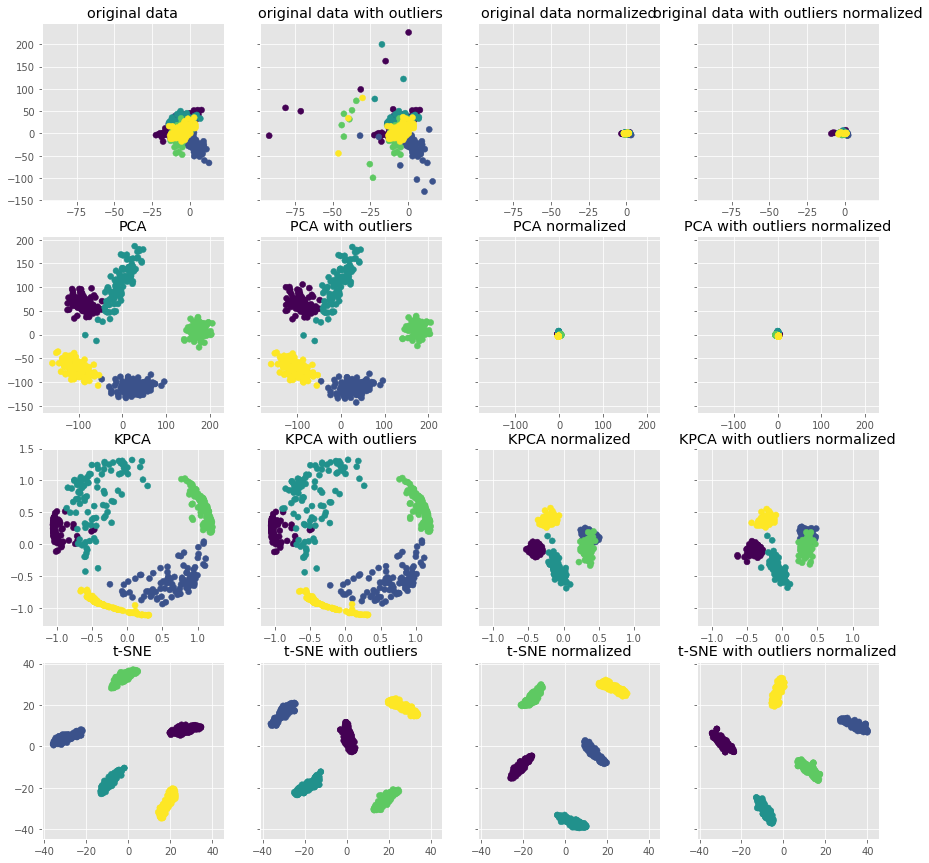

In [98]:
def visualize_2d(data, labels, dim_red_str):
    fig, ax = plt.subplots(nrows=4, ncols=4, sharex='row', sharey='row', figsize=(15,15))

    for i in range(len(dim_red_str)):
        for j in range(4):
            data = proj_data[j][i]
            ax[j,i].scatter(data[:,0], data[:,1], c=labels)
            title_str = dim_red_str[i] + " with outliers" if j==1 or j==3 else dim_red_str[i] 
            title_str = title_str + " normalized" if j==2 or j==3 else title_str
            ax[i,j].set_title(title_str)

    
plt.style.use("ggplot")
visualize_2d(proj_data, y, dim_red_str)

plt.show()

In [74]:
def get_silhouette_score(data):
    db = DBSCAN(eps=8, min_samples=30).fit(X)
    labels_db = db.labels_
    s_score_db = metrics.silhouette_score(data, labels_db)
    
    km = KMeans(n_clusters=5).fit(X)
    labels_km = km.labels_
    s_score_km = metrics.silhouette_score(data, labels_km)
        
    print("Silhouette score DBSCAN: %.3f \nSilhouette score K-Means: %.3f" %(s_score_db, s_score_km))
    

print("Original data")
get_silhouette_score(X)
print("With outliers")
get_silhouette_score(X_outliers)
print("pca")
get_silhouette_score(pca_result)
print("With outliers")
get_silhouette_score(pca_outliers)
print("kpca")
get_silhouette_score(kpca_result)
print("With outliers")
get_silhouette_score(kpca_outliers)
print("t_SNE")
get_silhouette_score(tsne_result)
print("With outliers")
get_silhouette_score(tsne_outliers)


Original data
Silhouette score DBSCAN: 0.371 
Silhouette score K-Means: 0.432
With outliers
Silhouette score DBSCAN: 0.319 
Silhouette score K-Means: 0.375
pca
Silhouette score DBSCAN: 0.255 
Silhouette score K-Means: 0.400
With outliers
Silhouette score DBSCAN: 0.048 
Silhouette score K-Means: 0.188
kpca
Silhouette score DBSCAN: 0.152 
Silhouette score K-Means: 0.317
With outliers
Silhouette score DBSCAN: 0.138 
Silhouette score K-Means: 0.299
t_SNE
Silhouette score DBSCAN: 0.631 
Silhouette score K-Means: 0.821
With outliers
Silhouette score DBSCAN: 0.564 
Silhouette score K-Means: 0.789


In [68]:
print(len(proj_data[0][0][0]))
#print(np.array(proj_data).shape)

30
